"""

author: Dominik Stec,

index: s12623,

email: s12623@pja.edu.pl

To run module:

import module into Google Colaboratory notebook and run.

This module recognize type of animal according to given image of animal.

Keras model is build as classification type and contains two types of classification neural network architecture.

"""

**First model**

In [1]:
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.4.1


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
print('before')
print('X_train size: ', len(X_train))
print('y_train size: ', len(y_train))
print()
print('still work:')
i = 0 
while not i == len(y_train):

  if y_train[i][0] in {0, 1, 8, 9}:
    X_train = np.delete(X_train, i, 0)
    y_train = np.delete(y_train, i, 0)
    i = i - 1
  i = i + 1

  if (i % (len(y_train) // 100)) == 0:
    print('{:.0%}'.format(i / len(y_train)), end=' ')
  if (i % (len(y_train) // 10)) == 0:
    print()

print()
print('done.')
print()
print('actual:')
print('X_train size: ', len(X_train))
print('y_train size: ', len(y_train))

before
X_train size:  50000
y_train size:  50000

still work:
1% 1% 2% 3% 3% 4% 5% 5% 6% 7% 8% 9% 10% 
11% 12% 13% 13% 14% 15% 16% 17% 18% 20% 
21% 22% 22% 23% 24% 24% 25% 25% 26% 27% 27% 28% 30% 30% 30% 
32% 33% 34% 36% 39% 40% 40% 40% 40% 
42% 43% 43% 44% 45% 46% 46% 47% 47% 47% 47% 47% 48% 49% 50% 51% 52% 52% 54% 54% 55% 58% 59% 59% 59% 59% 62% 62% 62% 62% 62% 64% 65% 66% 67% 69% 70% 
72% 74% 76% 77% 78% 80% 80% 
81% 83% 83% 83% 83% 83% 83% 85% 85% 85% 86% 88% 89% 89% 89% 
91% 92% 95% 96% 98% 98% 99% 100% 
100% 
100% 
100% 

done.

actual:
X_train size:  30000
y_train size:  30000


In [4]:
print('before')
print('X_test size: ', len(X_test))
print('y_test size: ', len(y_test))
print()
print('still work:')
i = 0 
while not i == len(y_test):

  if y_test[i][0] in {0, 1, 8, 9}:
    X_test = np.delete(X_test, i, 0)
    y_test = np.delete(y_test, i, 0)
    i = i - 1
  i = i + 1

  if (i % (len(y_test) // 100)) == 0:
    print('{:.0%}'.format(i / len(y_test)), end=' ')
  if (i % (len(y_test) // 10)) == 0:
    print()

print()
print('done.')
print()
print('actual:')
print('X_test size: ', len(X_test))
print('y_test size: ', len(y_test))

before
X_test size:  10000
y_test size:  10000

still work:
1% 2% 3% 4% 4% 5% 6% 7% 8% 8% 8% 10% 10% 10% 
12% 13% 13% 14% 14% 14% 15% 16% 16% 17% 18% 19% 20% 

21% 21% 23% 24% 24% 24% 25% 25% 25% 25% 25% 25% 25% 25% 25% 26% 26% 26% 27% 27% 28% 28% 29% 29% 30% 
32% 33% 33% 33% 34% 35% 36% 36% 37% 37% 37% 37% 38% 38% 39% 
41% 42% 42% 44% 45% 47% 47% 48% 50% 50% 
51% 51% 53% 53% 53% 53% 53% 53% 53% 54% 56% 57% 59% 59% 59% 59% 60% 62% 63% 63% 65% 66% 66% 68% 69% 69% 
71% 71% 72% 74% 74% 74% 75% 76% 79% 
81% 83% 83% 83% 85% 85% 86% 86% 88% 89% 
90% 92% 92% 92% 93% 94% 96% 96% 96% 96% 96% 98% 98% 100% 

done.

actual:
X_test size:  6000
y_test size:  6000


In [5]:
idx = 0
for y in y_train:
  if y[0] == 2:
    y_train[idx][0] = 0
  if y[0] == 3:
    y_train[idx][0] = 1
  if y[0] == 4:
    y_train[idx][0] = 2
  if y[0] == 5:
    y_train[idx][0] = 3
  if y[0] == 6:
    y_train[idx][0] = 4
  if y[0] == 7:
    y_train[idx][0] = 5
  idx = idx + 1

idx = 0
for y in y_test:
  if y[0] == 2:
    y_test[idx][0] = 0
  if y[0] == 3:
    y_test[idx][0] = 1
  if y[0] == 4:
    y_test[idx][0] = 2
  if y[0] == 5:
    y_test[idx][0] = 3
  if y[0] == 6:
    y_test[idx][0] = 4
  if y[0] == 7:
    y_test[idx][0] = 5
  idx = idx + 1

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test) 

print(y_train_cat.shape, y_test_cat.shape)


(30000, 6) (6000, 6)


In [6]:
model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, 
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, 
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(
            optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['categorical_accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [7]:
model.fit(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat))

Epoch 1/20
938/938 [==============================] - 11s 4ms/step - loss: 2.1222 - categorical_accuracy: 0.3216 - val_loss: 1.3486 - val_categorical_accuracy: 0.4768
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 1.2889 - categorical_accuracy: 0.4949 - val_loss: 1.3234 - val_categorical_accuracy: 0.4958
Epoch 3/20
938/938 [==============================] - 3s 4ms/step - loss: 1.1674 - categorical_accuracy: 0.5549 - val_loss: 1.1221 - val_categorical_accuracy: 0.5877
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 1.0545 - categorical_accuracy: 0.6053 - val_loss: 1.1455 - val_categorical_accuracy: 0.5760
Epoch 5/20
938/938 [==============================] - 3s 4ms/step - loss: 1.0029 - categorical_accuracy: 0.6301 - val_loss: 1.1082 - val_categorical_accuracy: 0.5843
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.9498 - categorical_accuracy: 0.6426 - val_loss: 1.0328 - val_categorical_accuracy: 0.6265
Epo

dog
prediction of animal:  dog


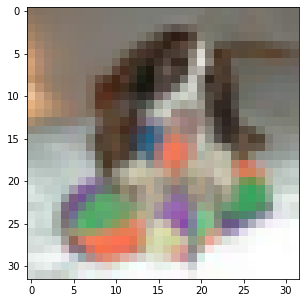

In [8]:
f, axarr = plt.subplots()
f.set_size_inches(16, 5)

animals_cifar10_map = {
    0: 'bird',
    1: 'cat',
    2: 'deer',
    3: 'dog',
    4: 'frog',
    5: 'horse'
}

i = random.randrange(0, len(X_test))
print(animals_cifar10_map[y_test[i][0]])
img = X_test[i]
axarr.imshow(img)

img_rgb = X_test[i].reshape(1,32,32,3) 
propability = model.predict(img_rgb)
max_prop_idx = np.argmax(propability)
predicted_animal = animals_cifar10_map[max_prop_idx]
print('prediction of animal: ', predicted_animal)


**Second model**

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, 
                 kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, 
                 kernel_size=(2, 2),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, 
                 kernel_size=(2, 2),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(
            optimizer='adam', 
            loss='categorical_crossentropy',
            metrics=['categorical_accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)         32896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [11]:
model.fit(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat))

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 6.3117 - categorical_accuracy: 0.3466 - val_loss: 1.3562 - val_categorical_accuracy: 0.4677
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 1.3094 - categorical_accuracy: 0.4908 - val_loss: 1.2066 - val_categorical_accuracy: 0.5302
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 1.1569 - categorical_accuracy: 0.5664 - val_loss: 1.1801 - val_categorical_accuracy: 0.5523
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 1.0312 - categorical_accuracy: 0.6117 - val_loss: 1.0246 - val_categorical_accuracy: 0.6150
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.9359 - categorical_accuracy: 0.6479 - val_loss: 1.0553 - val_categorical_accuracy: 0.6040
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.8573 - categorical_accuracy: 0.6824 - val_loss: 0.9755 - val_categorical_accuracy: 0.6453
Epoc

bird
prediction of animal:  bird


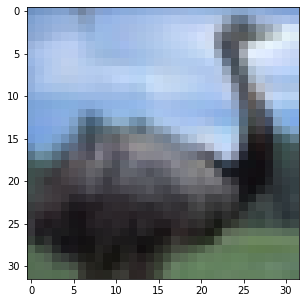

In [17]:
f, axarr = plt.subplots()
f.set_size_inches(16, 5)

animals_cifar10_map = {
    0: 'bird',
    1: 'cat',
    2: 'deer',
    3: 'dog',
    4: 'frog',
    5: 'horse'
}

i = random.randrange(0, len(X_test))
print(animals_cifar10_map[y_test[i][0]])
img = X_test[i]
axarr.imshow(img)

img_rgb = X_test[i].reshape(1,32,32,3) 
propability = model.predict(img_rgb)
max_prop_idx = np.argmax(propability)
predicted_animal = animals_cifar10_map[max_prop_idx]
print('prediction of animal: ', predicted_animal)
